In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import cv2
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from skimage.filters import gabor
from skimage.color import rgb2gray

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_normalize = pd.read_csv("test_normalize.csv")

In [3]:
# Set image folder path
folder_path = './images'  

# Check if the folder exists
if not os.path.exists(folder_path):
	raise FileNotFoundError(f"The folder path '{folder_path}' does not exist. Please provide the correct path.")

# Load image files
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg'))]

In [4]:
# Display the first few rows of the train dataset
print(train.head())

   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883  

In [5]:
# Display the first few rows of the test dataset
print(test.head())

   id   margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0   4  0.019531  0.009766  0.078125  0.011719  0.003906  0.015625  0.005859   
1   7  0.007812  0.005859  0.064453  0.009766  0.003906  0.013672  0.007812   
2   9  0.000000  0.000000  0.001953  0.021484  0.041016  0.000000  0.023438   
3  12  0.000000  0.000000  0.009766  0.011719  0.017578  0.000000  0.003906   
4  13  0.001953  0.000000  0.015625  0.009766  0.039062  0.000000  0.009766   

   margin8   margin9  ...  texture55  texture56  texture57  texture58  \
0      0.0  0.005859  ...   0.006836   0.000000   0.015625   0.000977   
1      0.0  0.033203  ...   0.000000   0.000000   0.006836   0.001953   
2      0.0  0.011719  ...   0.128910   0.000000   0.000977   0.000000   
3      0.0  0.003906  ...   0.012695   0.015625   0.002930   0.036133   
4      0.0  0.005859  ...   0.000000   0.042969   0.016602   0.010742   

   texture59  texture60  texture61  texture62  texture63  texture64  
0   0.015625    

In [6]:
# Display the first few rows of the test_normalize dataset
print(test_normalize.head())

   id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0   4         0.010101         0.010101   0.010101     0.010101   
1   7         0.010101         0.010101   0.010101     0.010101   
2   9         0.010101         0.010101   0.010101     0.010101   
3  12         0.010101         0.010101   0.010101     0.010101   
4  13         0.010101         0.010101   0.010101     0.010101   

   Acer_Palmatum  Acer_Pictum  Acer_Platanoids  Acer_Rubrum  Acer_Rufinerve  \
0       0.010101     0.010101         0.010101     0.010101        0.010101   
1       0.010101     0.010101         0.010101     0.010101        0.010101   
2       0.010101     0.010101         0.010101     0.010101        0.010101   
3       0.010101     0.010101         0.010101     0.010101        0.010101   
4       0.010101     0.010101         0.010101     0.010101        0.010101   

   ...  Salix_Fragilis  Salix_Intergra  Sorbus_Aria  Tilia_Oliveri  \
0  ...        0.010101        0.010101     0.010101 

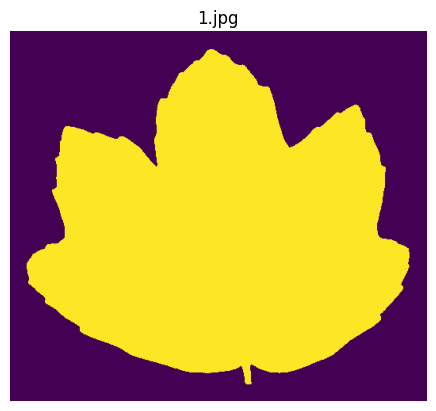

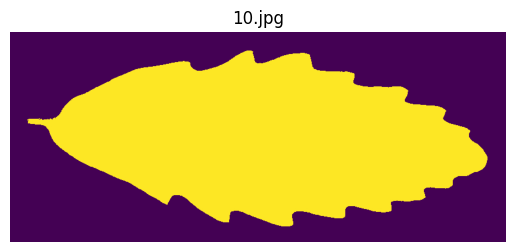

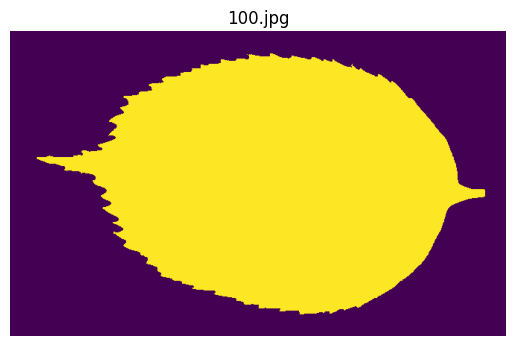

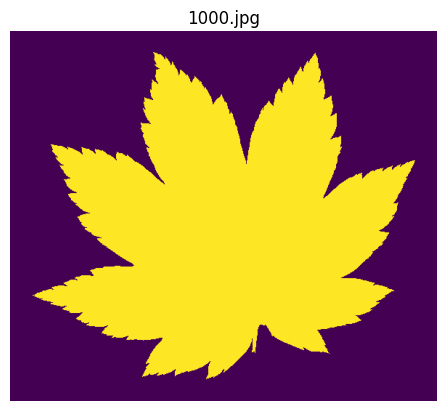

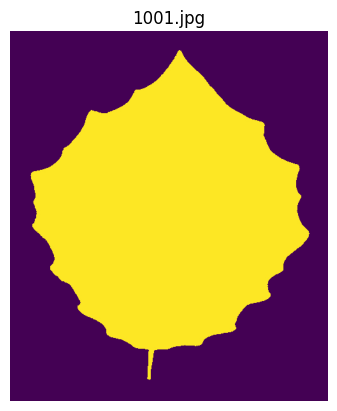

In [7]:
# Display images
for image_file in image_files[:5]:  # Display the first 5 images as an example
    image_path = os.path.join(folder_path, image_file)
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(image_file)
    plt.axis('off')
    plt.show()

In [31]:
# Define the compute_lbp function
def compute_lbp(image, radius, neighbors):
 
    return local_binary_pattern(image, P=neighbors, R=radius, method='uniform')

# Store processed images and LBP features
processed_images = []

# Display the LBP feature of the first processed image
if processed_images:
    lbp_image = processed_images[0]['lbp']
    plt.imshow(lbp_image, cmap='gray')
    plt.title('LBP Feature of the First Processed Image')
    plt.axis('off')
    plt.show()
else:
    print("No processed images available to display.")

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Compute LBP features
    lbp = compute_lbp(image_resized, radius=3, neighbors=24)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images.append({'filename': image_file, 'resized_image': image_resized, 'lbp': lbp})


No processed images available to display.
Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images

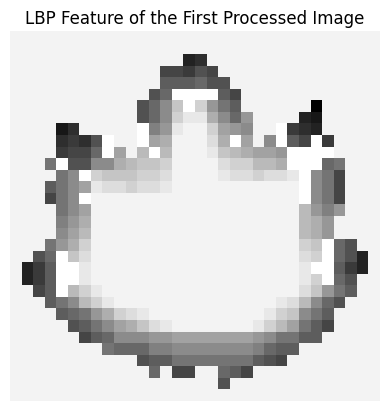

In [9]:
# Ensure processed_images is defined and not empty
if 'processed_images' in globals() and processed_images:
    # Display the LBP feature of the first processed image
    lbp_image = processed_images[0]['lbp']
    plt.imshow(lbp_image, cmap='gray')
    plt.title('LBP Feature of the First Processed Image')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images' is not defined or is empty. Please ensure CELL INDEX 8 is executed.")

In [10]:
# Store processed images and HOG features
processed_images_hog = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Compute HOG features
    hog_features = hog(image_resized, orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), block_norm='L2-Hys', visualize=False)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_hog)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_hog.append({'filename': image_file, 'resized_image': image_resized, 'hog': hog_features})


Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

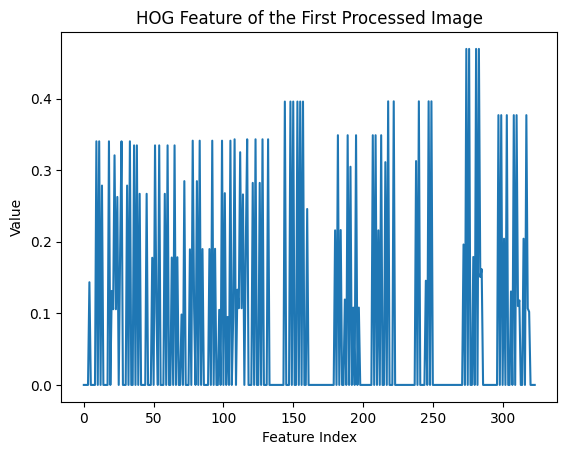

In [11]:
# Display the HOG feature of the first processed image
if 'processed_images_hog' in globals() and processed_images_hog:
    hog_features = processed_images_hog[0]['hog']
    plt.plot(hog_features)
    plt.title('HOG Feature of the First Processed Image')
    plt.xlabel('Feature Index')
    plt.ylabel('Value')
    plt.show()
else:
    print("Error: 'processed_images_hog' is not defined or is empty. Please ensure the relevant cell is executed.")

In [12]:
# Store processed images and color histogram features
processed_images_color_hist = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Compute color histogram features
    hist_b = cv2.calcHist([image_resized], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([image_resized], [1], None, [256], [0, 256])
    hist_r = cv2.calcHist([image_resized], [2], None, [256], [0, 256])

    # Normalize histograms and concatenate them
    hist_b = cv2.normalize(hist_b, hist_b).flatten()
    hist_g = cv2.normalize(hist_g, hist_g).flatten()
    hist_r = cv2.normalize(hist_r, hist_r).flatten()
    color_hist = np.concatenate([hist_b, hist_g, hist_r])

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_color_hist)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_color_hist.append({'filename': image_file, 'resized_image': image_resized, 'color_hist': color_hist})

Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

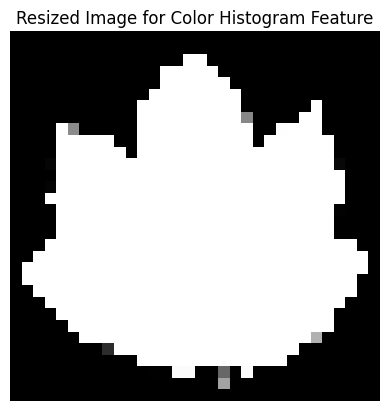

In [13]:
# Ensure processed_images_color_hist is defined and not empty
if 'processed_images_color_hist' in globals() and processed_images_color_hist:
    # Display the resized image corresponding to the color_hist feature
    image_data = processed_images_color_hist[0]['resized_image']
    plt.imshow(cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image for Color Histogram Feature')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images_color_hist' is not defined or is empty. Please ensure CELL INDEX 12 is executed.")

In [14]:
# Store processed images and Gabor features
processed_images_gabor = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Resize the image to 32x32
    image_resized = cv2.resize(gray_image, (32, 32))

    # Compute Gabor features
    gabor_real, gabor_imag = gabor(image_resized, frequency=0.6)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_gabor)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_gabor.append({'filename': image_file, 'resized_image': image_resized, 
                                   'gabor_real': gabor_real, 'gabor_imag': gabor_imag})

Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

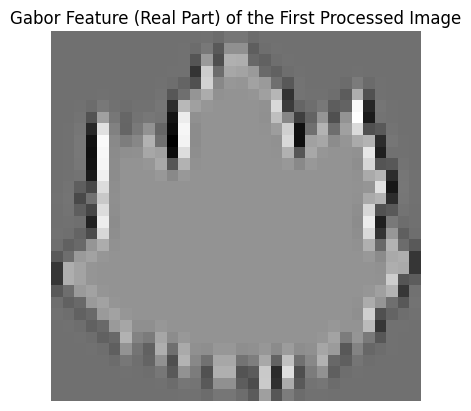

In [15]:
# Ensure processed_images_gabor is defined and not empty
if 'processed_images_gabor' in globals() and processed_images_gabor:
    # Display the real part of the Gabor feature of the first processed image
    gabor_real_image = processed_images_gabor[0]['gabor_real']
    plt.imshow(gabor_real_image, cmap='gray')
    plt.title('Gabor Feature (Real Part) of the First Processed Image')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images_gabor' is not defined or is empty. Please ensure CELL INDEX 14 is executed.")

In [16]:
# Store processed images and edge features
processed_images_edge = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Resize the image to 32x32
    image_resized = cv2.resize(gray_image, (32, 32))

    # Apply Canny edge detection
    edges = cv2.Canny((image_resized * 255).astype(np.uint8), 100, 200)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_edge)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_edge.append({'filename': image_file, 'resized_image': image_resized, 'edges': edges})


Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

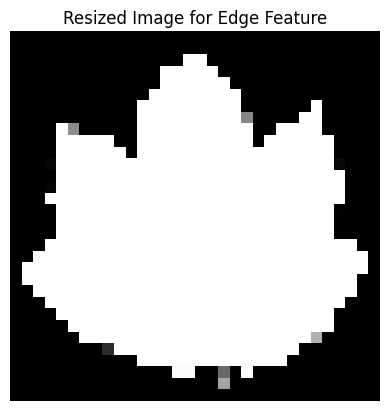

In [17]:
# Ensure processed_images_edge is defined and not empty
if 'processed_images_edge' in globals() and processed_images_edge:
	# Display the resized image corresponding to the edge feature
	edge_image_data = processed_images_edge[0]['resized_image']
	plt.imshow(edge_image_data, cmap='gray')
	plt.title('Resized Image for Edge Feature')
	plt.axis('off')
	plt.show()
else:
	print("Error: 'processed_images_edge' is not defined or is empty. Please ensure the relevant cell is executed.")

In [18]:
# Store processed images and intensity statistics
processed_images_intensity = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Compute intensity statistics
    mean_intensity = np.mean(image_resized)
    std_intensity = np.std(image_resized)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_intensity)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_intensity.append({'filename': image_file, 'resized_image': image_resized, 
                                       'mean_intensity': mean_intensity, 'std_intensity': std_intensity})

Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

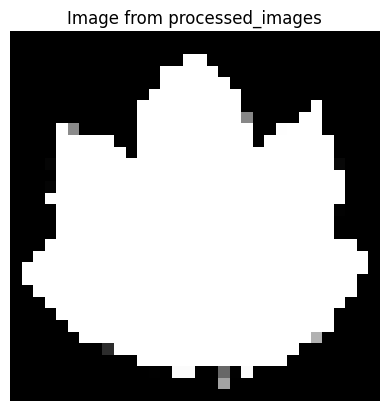

In [19]:
# Display the first image from processed_images
image_data = processed_images[0]['resized_image']
plt.imshow(image_data, cmap='gray')
plt.title('Image from processed_images')
plt.axis('off')
plt.show()


In [20]:
# Store processed images and Fourier Transform features
processed_images_fourier = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Compute Fourier Transform
    f_transform = np.fft.fft2(image_resized)
    f_shift = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_shift)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_fourier)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_fourier.append({'filename': image_file, 'resized_image': image_resized, 
                                     'fourier_magnitude': magnitude_spectrum})

Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

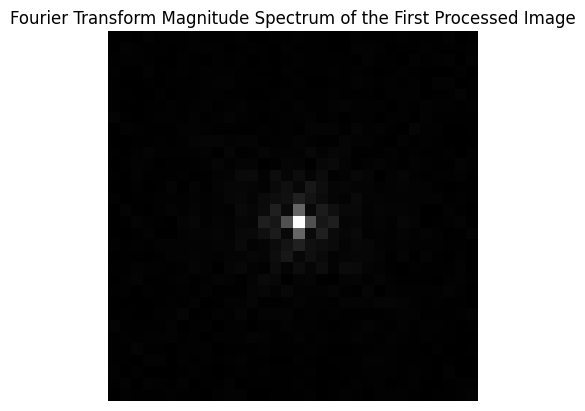

In [21]:
# Ensure processed_images_fourier is defined and not empty
if 'processed_images_fourier' in globals() and processed_images_fourier:
    # Display the Fourier Transform magnitude spectrum of the first processed image
    fourier_magnitude = processed_images_fourier[0]['fourier_magnitude']
    plt.imshow(fourier_magnitude, cmap='gray')
    plt.title('Fourier Transform Magnitude Spectrum of the First Processed Image')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images_fourier' is not defined or is empty. Please ensure the relevant cell is executed.")

In [22]:
# Initialize SIFT detector
sift = cv2.SIFT_create()

# Store processed images and SIFT features
processed_images_sift = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Detect and compute SIFT features
    keypoints, descriptors = sift.detectAndCompute(image_resized, None)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_sift)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_sift.append({'filename': image_file, 'resized_image': image_resized, 
                                  'keypoints': keypoints, 'descriptors': descriptors})


Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

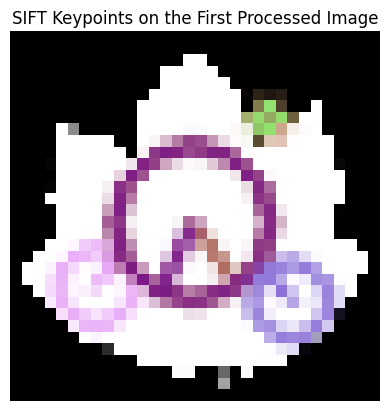

In [23]:
# Ensure processed_images_sift is defined and not empty
if 'processed_images_sift' in globals() and processed_images_sift:
    # Get the first processed image and its keypoints
    sift_image_data = processed_images_sift[0]['resized_image']
    keypoints = processed_images_sift[0]['keypoints']

    # Draw keypoints on the image
    sift_image_with_keypoints = cv2.drawKeypoints(
        sift_image_data, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Display the image with keypoints
    plt.imshow(sift_image_with_keypoints, cmap='gray')
    plt.title('SIFT Keypoints on the First Processed Image')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images_sift' is not defined or is empty. Please ensure the relevant cell is executed.")

In [24]:
# Initialize ORB detector
orb = cv2.ORB_create()

# Store processed images and ORB features
processed_images_orb = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Detect and compute ORB features
    keypoints, descriptors = orb.detectAndCompute(image_resized, None)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_orb)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_orb.append({'filename': image_file, 'resized_image': image_resized, 
                                  'keypoints': keypoints, 'descriptors': descriptors})

Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

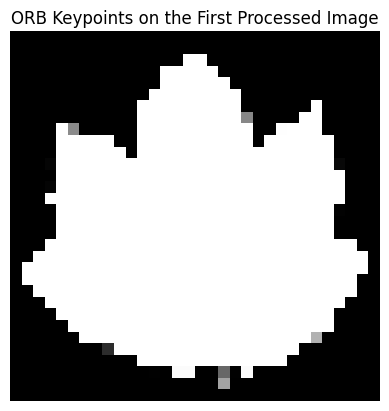

In [25]:
# Ensure processed_images_orb is defined and not empty
if 'processed_images_orb' in globals() and processed_images_orb:
    # Get the first processed image and its keypoints
    orb_image_data = processed_images_orb[0]['resized_image']
    keypoints = processed_images_orb[0]['keypoints']

    # Draw keypoints on the image
    orb_image_with_keypoints = cv2.drawKeypoints(
        orb_image_data, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Display the image with keypoints
    plt.imshow(orb_image_with_keypoints, cmap='gray')
    plt.title('ORB Keypoints on the First Processed Image')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images_orb' is not defined or is empty. Please ensure the relevant cell is executed.")

In [26]:
# Store processed images and fractal dimension features
processed_images_fractal = []

# Function to compute fractal dimension
def compute_fractal_dimension(image):
    # Binarize the image
    binary_image = image > image.mean()
    # Compute fractal dimension using box-counting method
    sizes = np.arange(2, min(image.shape) // 2, 2)
    counts = []
    for size in sizes:
        count = 0
        for i in range(0, image.shape[0], size):
            for j in range(0, image.shape[1], size):
                if binary_image[i:i+size, j:j+size].any():
                    count += 1
        counts.append(count)
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    return -coeffs[0]

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Compute fractal dimension
    fractal_dimension = compute_fractal_dimension(image_resized)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_fractal)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_fractal.append({'filename': image_file, 'resized_image': image_resized, 
                                     'fractal_dimension': fractal_dimension})

Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

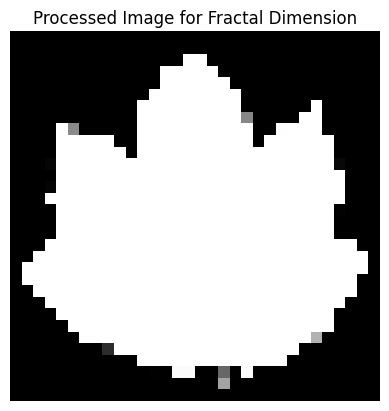

In [27]:
# Ensure processed_images_fractal is defined and not empty
if 'processed_images_fractal' in globals() and processed_images_fractal:
    # Get the first processed image
    fractal_image_data = processed_images_fractal[0]['resized_image']
    
    # Display the image
    plt.imshow(fractal_image_data, cmap='gray')
    plt.title('Processed Image for Fractal Dimension')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images_fractal' is not defined or is empty. Please ensure the relevant cell is executed.")

In [28]:
# Store processed images and Harris corner features
processed_images_harris = []

# Process all images in the folder
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Image not found or could not be loaded: {image_file}")
        continue

    # Resize the image to 32x32
    image_resized = cv2.resize(image, (32, 32))

    # Detect Harris corners
    harris_corners = cv2.cornerHarris(image_resized, blockSize=2, ksize=3, k=0.04)

    # Normalize the Harris corner response for visualization
    harris_corners_normalized = cv2.normalize(harris_corners, None, 0, 255, cv2.NORM_MINMAX)

    # Calculate the ratio of processed images to the total number of images
    processed_count = len(processed_images_harris)
    total_images = len(image_files)
    process_ratio = processed_count / total_images if total_images > 0 else 0
    print(f"Processed Images: {processed_count}/{total_images} ({process_ratio:.2%})")

    # Store the results
    processed_images_harris.append({'filename': image_file, 'resized_image': image_resized, 
                                    'harris_corners': harris_corners_normalized})

Processed Images: 0/1584 (0.00%)
Processed Images: 1/1584 (0.06%)
Processed Images: 2/1584 (0.13%)
Processed Images: 3/1584 (0.19%)
Processed Images: 4/1584 (0.25%)
Processed Images: 5/1584 (0.32%)
Processed Images: 6/1584 (0.38%)
Processed Images: 7/1584 (0.44%)
Processed Images: 8/1584 (0.51%)
Processed Images: 9/1584 (0.57%)
Processed Images: 10/1584 (0.63%)
Processed Images: 11/1584 (0.69%)
Processed Images: 12/1584 (0.76%)
Processed Images: 13/1584 (0.82%)
Processed Images: 14/1584 (0.88%)
Processed Images: 15/1584 (0.95%)
Processed Images: 16/1584 (1.01%)
Processed Images: 17/1584 (1.07%)
Processed Images: 18/1584 (1.14%)
Processed Images: 19/1584 (1.20%)
Processed Images: 20/1584 (1.26%)
Processed Images: 21/1584 (1.33%)
Processed Images: 22/1584 (1.39%)
Processed Images: 23/1584 (1.45%)
Processed Images: 24/1584 (1.52%)
Processed Images: 25/1584 (1.58%)
Processed Images: 26/1584 (1.64%)
Processed Images: 27/1584 (1.70%)
Processed Images: 28/1584 (1.77%)
Processed Images: 29/158

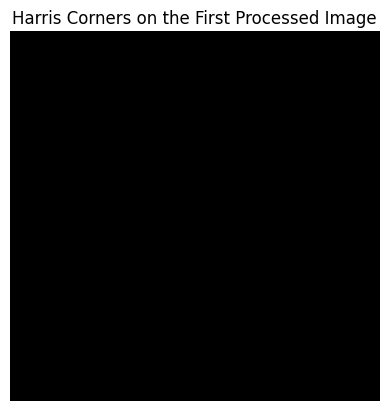

In [29]:
# Ensure processed_images_harris is defined and not empty
if 'processed_images_harris' in globals() and processed_images_harris:
    # Get the first processed image and its Harris corners
    harris_image_data = processed_images_harris[0]['resized_image']
    harris_corners = processed_images_harris[0]['harris_corners']

    # Overlay Harris corners on the image
    overlay = harris_image_data.copy()
    overlay[harris_corners > 0.01 * harris_corners.max()] = 255

    # Display the image with Harris corners
    plt.imshow(overlay, cmap='gray')
    plt.title('Harris Corners on the First Processed Image')
    plt.axis('off')
    plt.show()
else:
    print("Error: 'processed_images_harris' is not defined or is empty. Please ensure the relevant cell is executed.")

In [30]:
# Ensure all required variables are defined and in the correct format
if 'processed_images_intensity' in globals() and 'processed_images_edge' in globals() and \
    'processed_images_gabor' in globals() and 'processed_images_color_hist' in globals() and \
    'processed_images_hog' in globals() and 'processed_images' in globals() and \
    'processed_images_harris' in globals() and 'processed_images_fractal' in globals() and \
    'processed_images_orb' in globals() and 'processed_images_sift' in globals() and \
    'processed_images_fourier' in globals() and 'test_normalize' in globals() and 'train' in globals():
     
    # Combine additional features into a DataFrame
    additional_features = pd.DataFrame({
        'mean_intensity': [item['mean_intensity'] for item in processed_images_intensity],
        'std_intensity': [item['std_intensity'] for item in processed_images_intensity],
        'edges': [item['edges'].flatten() for item in processed_images_edge],
        'gabor_real': [item['gabor_real'].flatten() for item in processed_images_gabor],
        'gabor_imag': [item['gabor_imag'].flatten() for item in processed_images_gabor],
        'color_hist': [item['color_hist'] for item in processed_images_color_hist],
        'hog': [item['hog'] for item in processed_images_hog],
        'lbp': [item['lbp'] for item in processed_images],
        'harris_corners': [item['harris_corners'].flatten() for item in processed_images_harris],
        'fractal_dimension': [item['fractal_dimension'] for item in processed_images_fractal],
        'orb_descriptors': [item['descriptors'].flatten() if item['descriptors'] is not None else None for item in processed_images_orb],
        'sift_descriptors': [item['descriptors'].flatten() if item['descriptors'] is not None else None for item in processed_images_sift],
        'fourier_magnitude': [item['fourier_magnitude'].flatten() for item in processed_images_fourier]
    })

    # Concatenate the additional features with test_normalize and train DataFrames
    combined_features = pd.concat([test_normalize, train, additional_features], axis=1)

    # Display the combined DataFrame
    print(combined_features.head())
else:
    print("Error: One or more required variables are not defined or are empty. Please ensure all processing cells are executed.")

     id  Acer_Capillipes  Acer_Circinatum  Acer_Mono  Acer_Opalus  \
0   4.0         0.010101         0.010101   0.010101     0.010101   
1   7.0         0.010101         0.010101   0.010101     0.010101   
2   9.0         0.010101         0.010101   0.010101     0.010101   
3  12.0         0.010101         0.010101   0.010101     0.010101   
4  13.0         0.010101         0.010101   0.010101     0.010101   

   Acer_Palmatum  Acer_Pictum  Acer_Platanoids  Acer_Rubrum  Acer_Rufinerve  \
0       0.010101     0.010101         0.010101     0.010101        0.010101   
1       0.010101     0.010101         0.010101     0.010101        0.010101   
2       0.010101     0.010101         0.010101     0.010101        0.010101   
3       0.010101     0.010101         0.010101     0.010101        0.010101   
4       0.010101     0.010101         0.010101     0.010101        0.010101   

   ...                                         gabor_real  \
0  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 